# Thompson Sampling

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [ ]:
import random # to generate random distribution for each ads
N = 500
d = 10
ads_selected = [] # to store the data of selected ads we initialised a list
numbers_of_rewards_1 = [0] * d # in thompson sampling we track both -: reward 1 for seeing the ad
numbers_of_rewards_0 = [0] * d # and reward 0 for not opening the ad
total_reward = 0
for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1) # formula to calculate beta variable  using random distribution with betavariate function
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad] # getting the value of 0 or 1 from the cell in the data set for each ad
  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  total_reward = total_reward + reward

## Visualising the results - Histogram

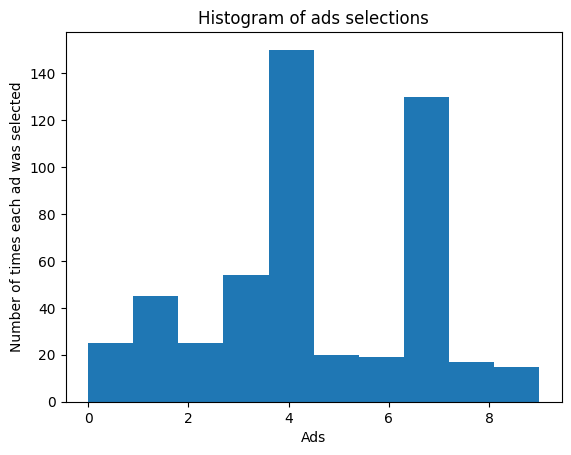

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()
# thompson sampling is more powerful and faster alogorithm than ucb as it is showing accurate result even in 500 dataset which is very less data